In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert.head()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
0,2018-07-07 11:15:00,37.364,10.4,0.0
1,2018-07-07 11:30:00,37.594,10.4,0.0
2,2018-07-07 11:45:00,37.590,10.4,0.0
3,2018-07-07 12:00:00,37.587,10.5,0.0
4,2018-07-07 12:15:00,37.584,10.5,0.0


In [2]:
mtalbert.index.freq='15min'
mtalbert.head()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
0,2018-07-07 11:15:00,37.364,10.4,0.0
1,2018-07-07 11:30:00,37.594,10.4,0.0
2,2018-07-07 11:45:00,37.590,10.4,0.0
3,2018-07-07 12:00:00,37.587,10.5,0.0
4,2018-07-07 12:15:00,37.584,10.5,0.0


In [3]:
mtalbert.tail()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
186292,2024-10-08 23:00:00,49.499,17.225,0.0
186293,2024-10-08 23:15:00,49.332,17.218,0.0
186294,2024-10-08 23:30:00,49.334,17.064,0.0
186295,2024-10-08 23:45:00,49.330,17.064,0.5
186296,2024-10-09 00:00:00,49.332,17.060,0.0


# Basic Timeseries Forecast

In [4]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186297 entries, 0 to 186296
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Timestamp (UTC+12:00)  186297 non-null  datetime64[ns]
 1   SoilMoisture(%)        186297 non-null  float64       
 2   SoilTemp(c)            186297 non-null  float64       
 3   Rain(mm)               186297 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.7 MB


In [5]:
186297 * 85/100

158352.45

In [6]:
162152/186297 * 100

87.03951217679297

In [7]:
mtalbert.iloc[[158352]]

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
158352,2023-11-22 10:00:00,48.418,19.8,0.0


In [8]:
mtalbert.iloc[[162152]]

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
162152,2024-01-01,47.475,24.0,0.0


In [9]:
# Train test split

train_data = mtalbert.iloc[:158352]
test_data = mtalbert.iloc[158351:]


In [10]:
96*14

1344

In [11]:
186297-158351

27946

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#  96 data points per day (24 hours × 4 intervals per hour = 96).
fitted_model = ExponentialSmoothing(train_data['SoilMoisture(%)'], trend='add', seasonal='add', seasonal_periods=96 ).fit()

c:\Users\Ying\.conda\envs\level8\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
test_predictions = fitted_model.forecast(27946)

<Axes: >

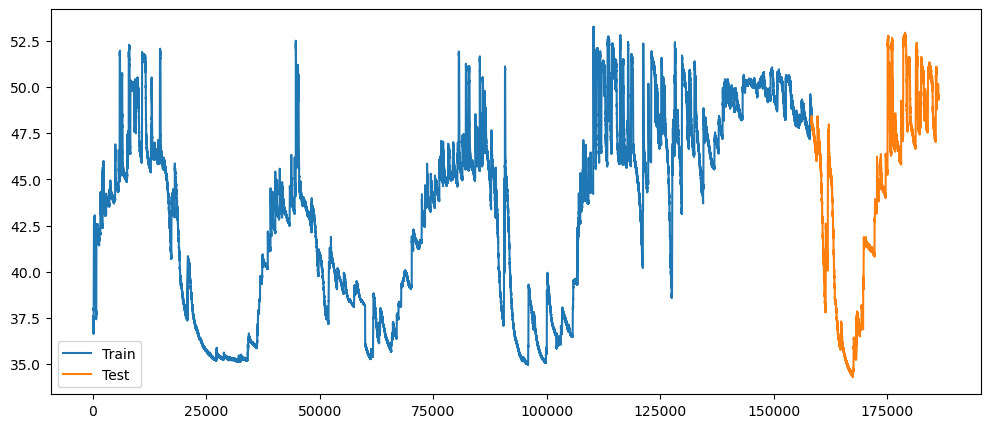

In [ ]:
train_data['SoilMoisture(%)'].plot(legend=True, label="Train", figsize=(12,5))
test_data['SoilMoisture(%)'].plot(legend=True, label="Test")

<Axes: >

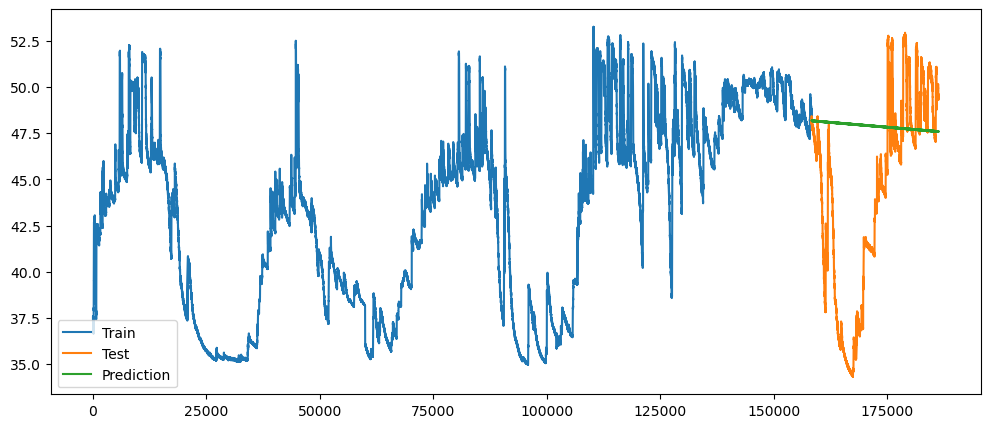

In [ ]:
# to see how well is the prediction
train_data['SoilMoisture(%)'].plot(legend=True, label="Train", figsize=(12,5))
test_data['SoilMoisture(%)'].plot(legend=True, label="Test")
test_predictions.plot(legend=True, label="Prediction")

In [ ]:
print(test_predictions)


158352    48.166185
158353    48.164677
158354    48.165742
158355    48.165057
158356    48.165356
            ...    
186293    47.586077
186294    47.587257
186295    47.588158
186296    47.588463
186297    47.586221
Length: 27946, dtype: float64


# evaluating forecast predictions

To perform a forecast for a continuos value on a test set, there are two values: 
- y : the ral value of the test data
- y^ : the predicted value form the forecast

In [ ]:
# Mean Absolute Error (MAE) - The absolute value of errors.
# Mean Squared Error (MSE) - The mean of the squared errors. (this we can see the large error even larger to see the contrast)
# Root Mean Square Error (RMSE) - THe root of the mean of the squared errors.

from sklearn.metrics import mean_absolute_error, mean_squared_error

test_data.describe()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
count,27946,27946.000000,27946.000000,27946.000000
mean,2024-05-04 05:12:53.144635904,44.173503,17.325716,0.035956
min,2023-11-22 09:45:00,34.323000,10.900000,0.000000
25%,2024-02-03 04:18:45,40.289000,13.900000,0.000000
50%,2024-05-16 10:22:30,45.542000,15.600000,0.000000
75%,2024-07-28 04:56:15,47.895000,21.700000,0.000000
max,2024-10-09 00:00:00,52.928000,25.400000,8.500000
std,NaN,5.348726,4.151301,0.249204


In [ ]:
test_predictions_df = pd.DataFrame(test_predictions, columns=['Predicted_SoilMoisture(%)'])


In [ ]:
print(f"Length of test_data: {len(test_data)}")
print(f"Length of test_predictions_df: {len(test_predictions_df)}")

Length of test_data: 27946
Length of test_predictions_df: 27946


In [ ]:
mae = mean_absolute_error(test_data['SoilMoisture(%)'].values, test_predictions_df['Predicted_SoilMoisture(%)'].values)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 5.0262119903448585


In [ ]:
mean_squared_error(test_data['SoilMoisture(%)'],  test_predictions_df['Predicted_SoilMoisture(%)'])

43.423164154178004

A simple differencing model to check stationary

In [ ]:
from statsmodels.tsa.statespace.tools import diff
# Differencing is often used to make a time series stationary
# can do the shift to check the different for each row - munually
# mtalbert['SoilMoisture(%)'] - mtalbert['SoilMoisture(%)'].shift(1)

# statmodel come with the funtion diff
diff( mtalbert['SoilMoisture(%)'], k_diff=1)

1         0.230
2        -0.004
3        -0.003
4        -0.003
5        -0.235
          ...  
186292   -0.004
186293   -0.167
186294    0.002
186295   -0.004
186296    0.002
Name: SoilMoisture(%), Length: 186296, dtype: float64

# ACF and PACF

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [ ]:
mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert.head()
mtalbert.index.freq='15min'
mtalbert.head()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
0,2018-07-07 11:15:00,37.364,10.4,0.0
1,2018-07-07 11:30:00,37.594,10.4,0.0
2,2018-07-07 11:45:00,37.590,10.4,0.0
3,2018-07-07 12:00:00,37.587,10.5,0.0
4,2018-07-07 12:15:00,37.584,10.5,0.0


In [ ]:
mtalbert.isna().sum()


Timestamp (UTC+12:00)    0
SoilMoisture(%)          0
SoilTemp(c)              0
Rain(mm)                 0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
acf(mtalbert['SoilMoisture(%)'])

array([1.        , 0.99989364, 0.99979333, 0.99968142, 0.9995595 ,
       0.99942853, 0.99928741, 0.99913905, 0.99898558, 0.99882537,
       0.99865889, 0.99848783, 0.99831125, 0.99813104, 0.99794627,
       0.99775814, 0.99756817, 0.9973747 , 0.99717678, 0.99697452,
       0.99676828, 0.9965584 , 0.99634536, 0.9961296 , 0.99591188,
       0.99569175, 0.99546869, 0.99524427, 0.99501786, 0.99478895,
       0.99455829, 0.99432498, 0.9940904 , 0.9938541 , 0.99361565,
       0.9933767 , 0.99313622, 0.99289324, 0.99264801, 0.99240106,
       0.99215344, 0.99190537, 0.99165764, 0.99140817, 0.99115854,
       0.99090708, 0.99065596, 0.99040391, 0.99015094, 0.9898975 ,
       0.98964376, 0.98938941, 0.98913458])

In [ ]:
pacf_yw(mtalbert['SoilMoisture(%)'], nlags=96, method='mle')

array([ 1.00000000e+00,  9.99893640e-01,  2.83774395e-02, -5.37776359e-02,
       -5.03276856e-02, -4.27371646e-02, -4.53706625e-02, -3.04583694e-02,
       -1.74222191e-02, -2.39456274e-02, -2.26828566e-02, -1.41706965e-02,
       -1.77776942e-02, -9.70274350e-03, -1.30895266e-02, -8.23956801e-03,
       -9.18217776e-04, -8.62990554e-03, -1.48383546e-02, -1.48894553e-02,
       -1.26989449e-02, -1.07475353e-02, -7.88762232e-03, -5.25285337e-03,
       -1.93062906e-03, -4.19347298e-03, -7.41770096e-03, -4.73027878e-04,
       -2.89055108e-03, -6.28467389e-03, -3.01967539e-03, -7.00386528e-03,
       -1.26016491e-03, -2.92447460e-03, -5.34676898e-03,  2.12496497e-03,
       -2.07372509e-03, -7.58334626e-03, -7.04221202e-03, -3.87084212e-03,
        1.31560074e-03,  2.58113664e-03,  6.39275486e-03, -4.09829385e-03,
        1.63431152e-03, -5.66303983e-03,  3.69111348e-03, -1.10222775e-03,
       -1.97275554e-03, -8.94829383e-06,  1.05294396e-03, -7.01429635e-04,
       -6.16431172e-04, -

In [ ]:
pacf_ols(mtalbert['SoilMoisture(%)'], nlags=96)

array([ 1.00000000e+00,  9.99900705e-01,  2.90259085e-02, -5.76648385e-02,
       -5.40713174e-02, -4.47027286e-02, -4.68400266e-02, -3.42118317e-02,
       -1.85208892e-02, -2.40727085e-02, -2.48155228e-02, -1.56580146e-02,
       -1.60600677e-02, -9.61570585e-03, -1.37262054e-02, -7.47881949e-03,
       -1.07374369e-03, -1.01942009e-02, -1.58539671e-02, -1.56992592e-02,
       -1.32730991e-02, -1.11814984e-02, -7.06373391e-03, -6.20893821e-03,
       -8.43941261e-04, -3.14083709e-03, -7.72002921e-03, -2.76979673e-03,
       -1.67136689e-03, -6.32107514e-03, -3.12461010e-03, -6.79673202e-03,
       -1.16807518e-03, -3.06220344e-03, -5.69547174e-03,  3.03790551e-03,
       -2.51867183e-03, -7.57564307e-03, -7.94986166e-03, -1.66866821e-03,
        1.82523631e-03,  2.70602868e-03,  5.59739900e-03, -2.63430666e-03,
        1.92616753e-03, -6.22085426e-03,  3.89335829e-03, -1.21736066e-03,
       -2.28884444e-03, -8.72711563e-05,  1.47691244e-04, -8.07184692e-04,
       -6.68418240e-04, -

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

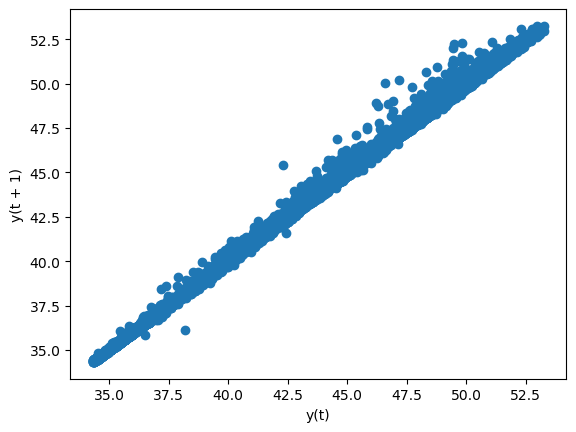

In [ ]:
from pandas.plotting import lag_plot
lag_plot(mtalbert['SoilMoisture(%)'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

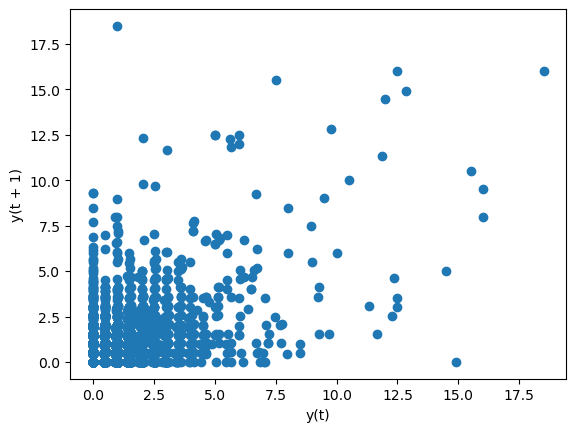

In [ ]:
lag_plot(mtalbert['Rain(mm)'])

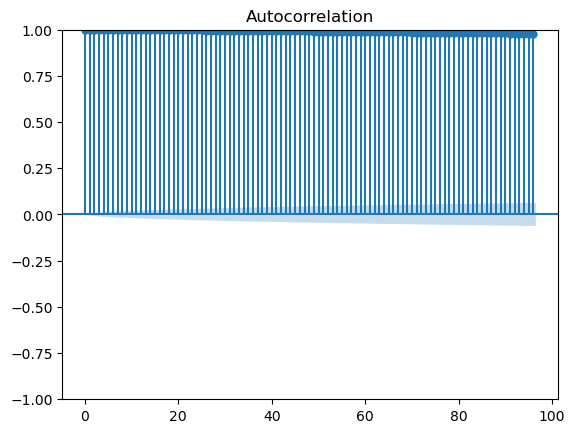

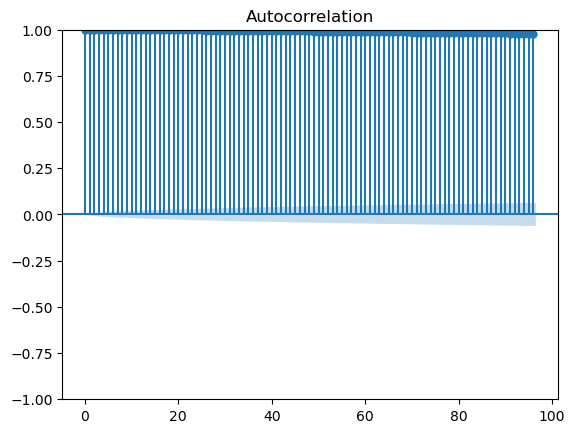

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mtalbert['SoilMoisture(%)'], lags=96)